# CLASSIFICACIÓN

## **Predicción del Éxito de un Nuevo Producto en el Mercado**

Este conjunto de datos contiene información sobre distintos productos lanzados al mercado, algunos de los cuales han tenido éxito y otros no. Incluye unas 10.000 observaciones, cada una correspondiente a un producto distinto.

### **Características del Dataset**

Cada producto tiene las siguientes características:

- **id**: Identificador único del producto.  
- **category**: Categoría del producto (Electrónica, Moda, Alimentación, Juguetes, etc.).  
- **price**: Precio del producto en euros.  
- **production_cost**: Coste de fabricación del producto en euros.  
- **marketing_budget**: Presupuesto de marketing asignado en euros.  
- **pre_launch_interest**: Número de usuarios registrados en lista de espera o seguidores antes del lanzamiento.  
- **brand_reputation**: Reputación de la marca (escala de 1 a 5).  
- **competitor_count**: Número de competidores directos en el mismo segmento.  
- **social_media_mentions**: Número de menciones en redes sociales antes del lanzamiento.  
- **previous_product_success**: Porcentaje de éxito de los últimos productos de la misma marca.  
- **season**: Estación en la que se lanza el producto (Invierno, Primavera, Verano, Otoño).  
- **success**: (Variable objetivo) Indica si el producto tuvo éxito (Yes) o no (No).  

### **Variable Objetivo**

La variable `success` clasifica los productos según su rendimiento en el mercado:

- **Yes**: Productos que han tenido éxito en ventas. (1)  
- **No**: Productos que no han alcanzado las expectativas de ventas. (0)

# Fase 1: Recopilación de los datos

In [ ]:
# Importación de las bibliotecas
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ruta = '/content/drive/MyDrive/CURSO_MACHINE_LEARNING/CSV/product_success_prediction_extended.csv'
df = pd.read_csv(ruta)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_testing = df.sample(frac=0.15, random_state=42)
df = df.drop(df_testing.index)
df_testing_ruido = df_testing.copy()

# Fase 2: Exploración y preparación de los datos

In [ ]:
# Comprobación de que los datos se han cargado correctamente
df

,id,price,production_cost,marketing_budget,pre_launch_interest,brand_reputation,competitor_count,social_media_mentions,previous_product_success,season,category,success
1,2,1241.898030,1137.696249,21818.976063,36448.247855,3.485357,23.908083,75276.884417,0.465686,Estiu,Llar,Yes
2,3,734.702097,681.881223,23711.763088,55201.563133,3.049967,26.886697,59442.897737,0.541248,Primavera,Joguines,No
4,5,583.898901,996.140088,10936.212023,34640.168865,2.530608,23.902600,66215.993931,0.346883,Estiu,Electrònica,No
5,6,1147.707960,643.971701,34722.820802,65661.246049,3.376234,21.801501,38162.344173,0.579901,Hivern,Electrònica,Yes
6,7,669.920946,818.693296,22394.914407,48717.143856,2.992396,24.906724,61966.040634,0.467043,Hivern,Joguines,No
...,...,...,...,...,...,...,...,...,...,...,...,...
10294,7969,790.500483,939.304133,25282.623808,37369.282898,2.476669,25.436090,66420.629133,0.452734,Hivern,Moda,No
10295,6551,1243.341329,827.506341,33653.127067,60257.869672,3.685249,21.965126,54890.743072,0.634900,Primavera,Joguines,Yes
10296,7643,914.553245,905.307953,NaN,47974.780215,2.516186,20.002551,49979.438260,0.532453,Estiu,Llar,No
10297,6164,921.173530,584.787544,NaN,60348.705781,3.279107,25.328455,41644.779869,0.448033,Tardor,Joguines,Yes


In [ ]:
# Información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8755 entries, 1 to 10299
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        8755 non-null   int64  
 1   price                     8329 non-null   float64
 2   production_cost           8755 non-null   float64
 3   marketing_budget          8322 non-null   float64
 4   pre_launch_interest       8310 non-null   float64
 5   brand_reputation          8755 non-null   float64
 6   competitor_count          8755 non-null   float64
 7   social_media_mentions     8755 non-null   float64
 8   previous_product_success  8755 non-null   float64
 9   season                    8755 non-null   object 
 10  category                  8755 non-null   object 
 11  success                   8755 non-null   object 
dtypes: float64(8), int64(1), object(3)
memory usage: 889.2+ KB


## Selección de características

In [ ]:
# Borrar id
df = df.drop('id',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8755 entries, 1 to 10299
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     8329 non-null   float64
 1   production_cost           8755 non-null   float64
 2   marketing_budget          8322 non-null   float64
 3   pre_launch_interest       8310 non-null   float64
 4   brand_reputation          8755 non-null   float64
 5   competitor_count          8755 non-null   float64
 6   social_media_mentions     8755 non-null   float64
 7   previous_product_success  8755 non-null   float64
 8   season                    8755 non-null   object 
 9   category                  8755 non-null   object 
 10  success                   8755 non-null   object 
dtypes: float64(8), object(3)
memory usage: 820.8+ KB


## Nulos

In [ ]:
# Mostramos cuántos valores nulos hay en cada columna
print(df.isnull().sum())

price                       426
production_cost               0
marketing_budget            433
pre_launch_interest         445
brand_reputation              0
competitor_count              0
social_media_mentions         0
previous_product_success      0
season                        0
category                      0
success                       0
dtype: int64


In [ ]:
# Como hay algunos valores nulos, en lugar de eliminarlos los actualizamos con su media
df.loc[:, 'price'] = df['price'].fillna(df['price'].median())
df.loc[:, 'marketing_budget'] = df['marketing_budget'].fillna(df['marketing_budget'].median())
df.loc[:, 'pre_launch_interest'] = df['pre_launch_interest'].fillna(df['pre_launch_interest'].median())

In [ ]:
print(df.isnull().sum())

price                       0
production_cost             0
marketing_budget            0
pre_launch_interest         0
brand_reputation            0
competitor_count            0
social_media_mentions       0
previous_product_success    0
season                      0
category                    0
success                     0
dtype: int64


## Únicos

In [ ]:
# Comprobación de los valores únicos en columnas de tipo object
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")

season: ['Estiu' 'Primavera' 'Hivern' 'Tardor']
category: ['Llar' 'Joguines' 'Electrònica' 'Aliments' 'Esports' 'Moda']
success: ['Yes' 'No']


## Duplicados

In [ ]:
# Comprobamos cuántas filas están duplicadas
print("Filas duplicadas:", df.duplicated().sum())

Filas duplicadas: 147


In [ ]:
# Eliminar duplicados manteniendo uno
df = df.drop_duplicates()

# Comprobar el número de duplicados después de la eliminación
print(f"Duplicados después de eliminar: {df.duplicated().sum()}")

Duplicados después de eliminar: 0


## Distribuciones

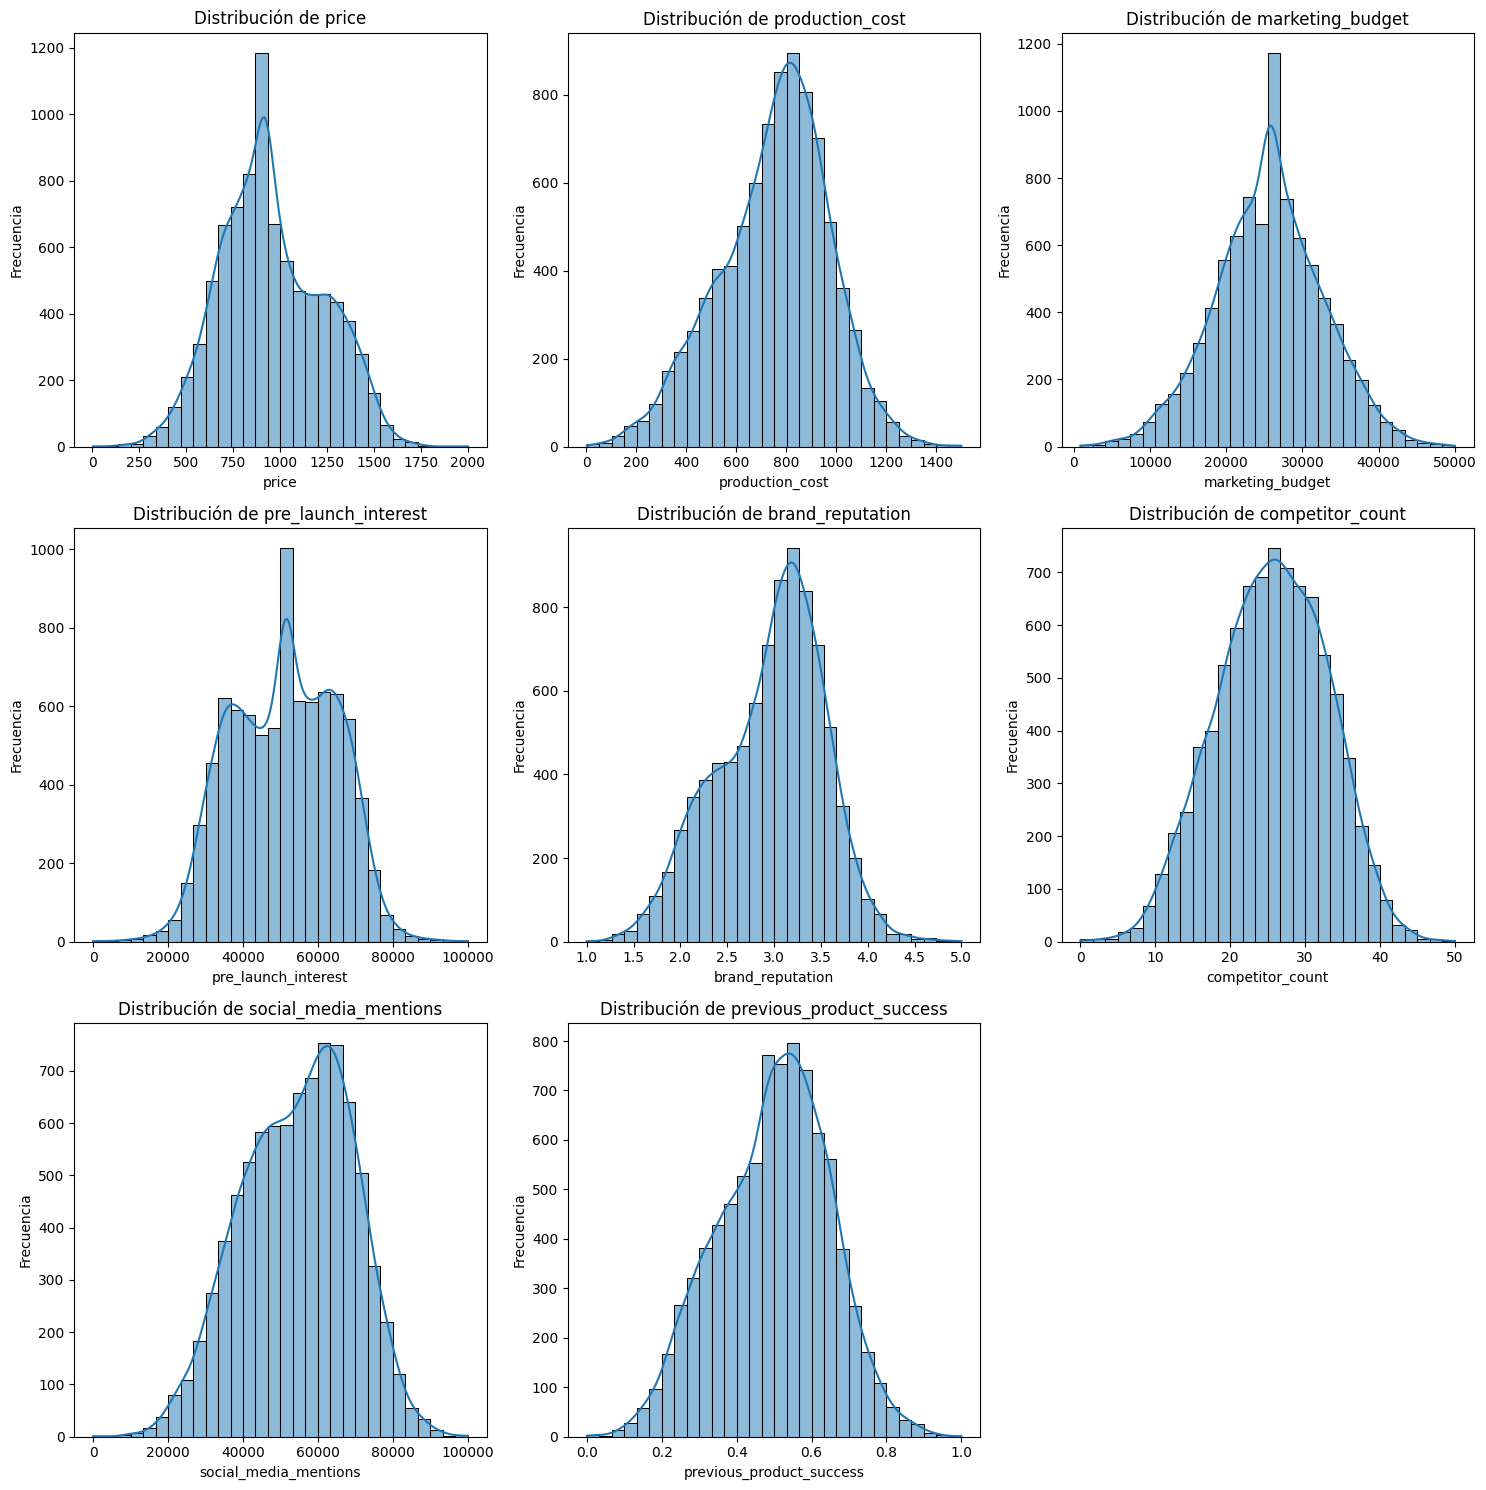

In [ ]:
"""
Si las características numéricas siguen una distribución normal, de entrada, un SVM podría ser una buena opción, así como las redes neuronales.
DT, RF y ADABOOST → no normales
"""

# Seleccionar solo las columnas numéricas de tipo int o float
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Definir el número de columnas y filas para los subplots con 3 columnas
num_cols_per_row = 3
num_rows = (len(num_cols) + num_cols_per_row - 1) // num_cols_per_row  # Calcular filas necesarias

# Crear la figura con 3 columnas
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols_per_row, figsize=(15, 5 * num_rows))

# Aplanar los ejes para facilitar la iteración
axes = axes.flatten()

# Generar histogramas para cada variable numérica
for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])  # Histograma con línea KDE
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

# Ocultar ejes vacíos si el número de variables es impar
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


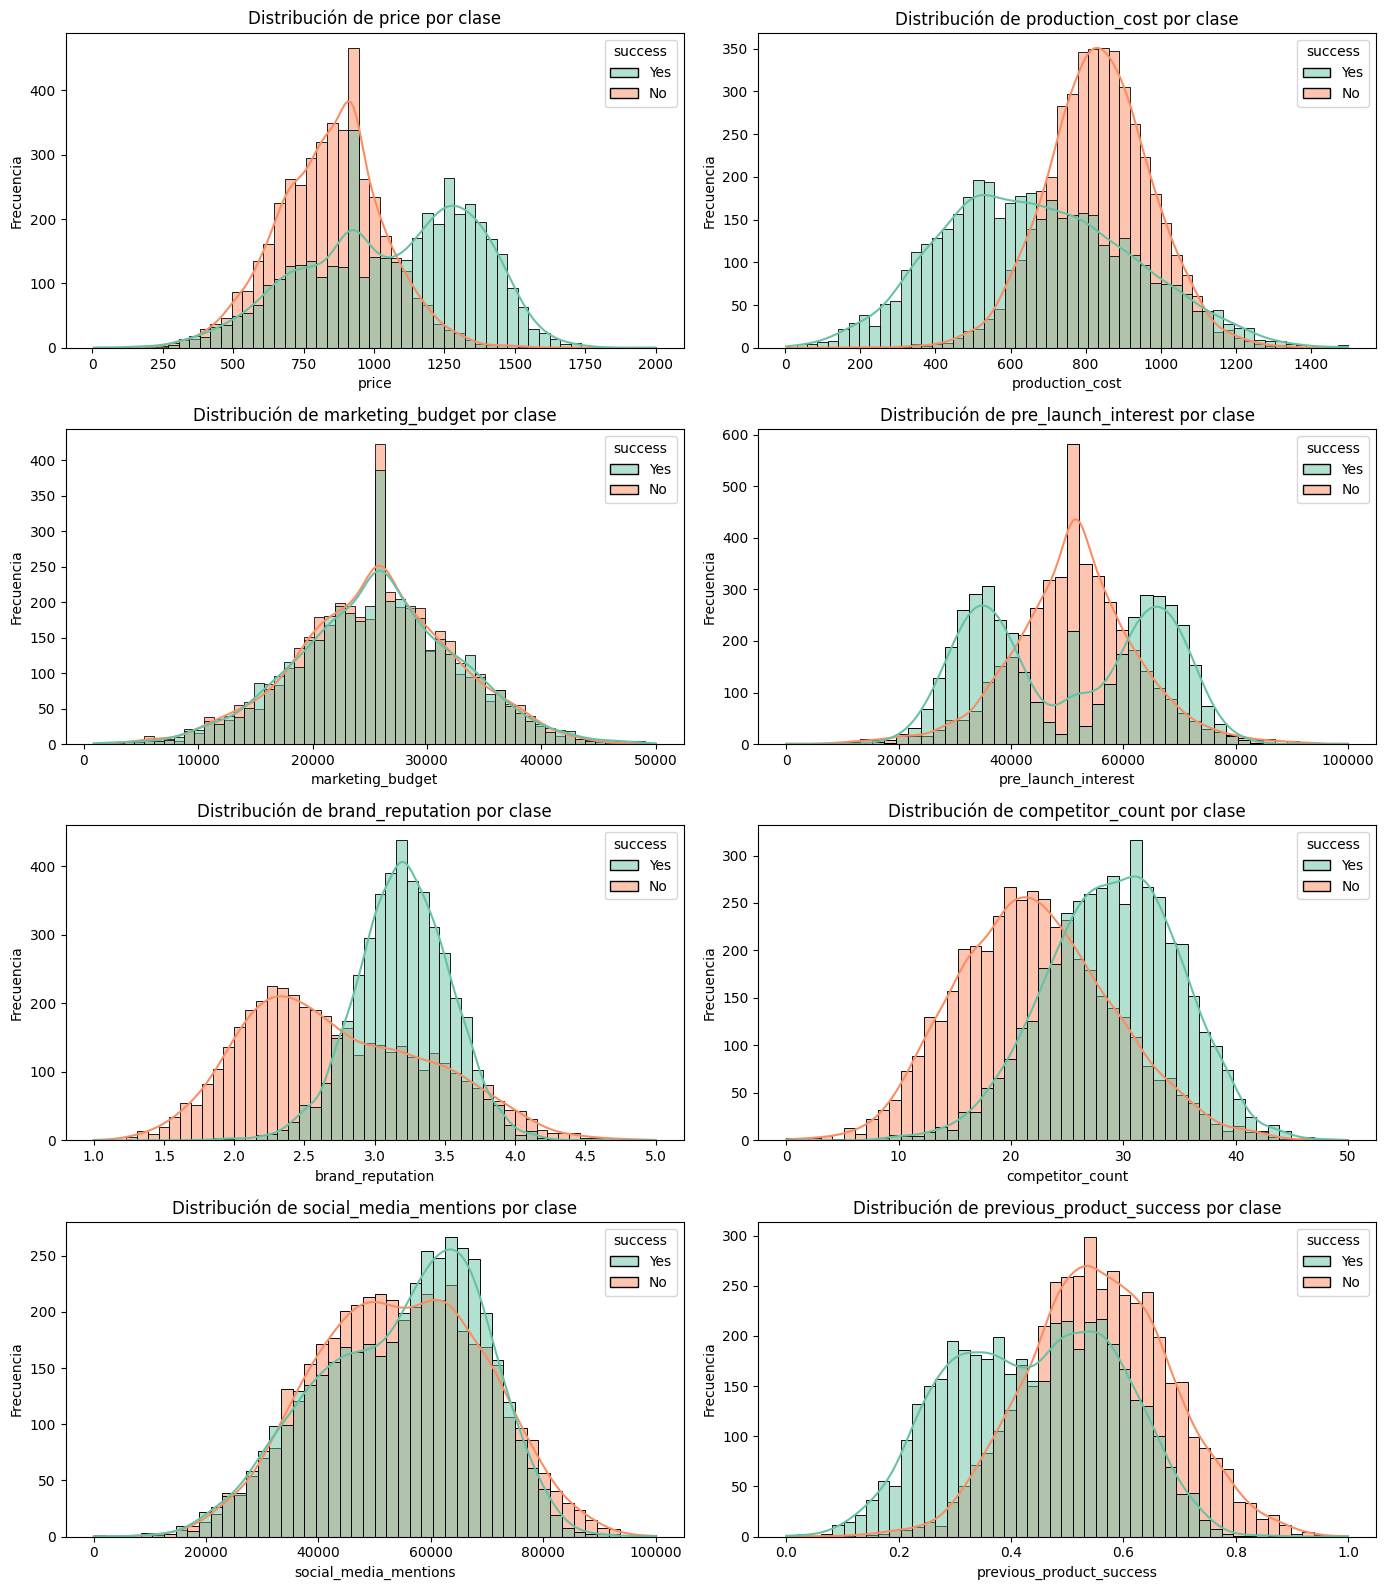

In [ ]:
# Comprovación de la distribución de los datos
"""
1. La variable más discriminativa es 'brand_reputation': los productos exitosos tienden a tener mayor reputación,
mientras que los no exitosos se concentran en valores bajos (alrededor de 2). Esta diferencia es clara y relevante.
2. En 'price', también se observa una separación: los productos con éxito suelen tener precios más altos,
mientras que los fallidos se agrupan en rangos bajos y medios. Aunque hay algo de solapamiento,
la tendencia es significativa y puede indicar una percepción de calidad o margen rentable.
Estas observaciones indican que las variables brand_reputation y price influyen de forma relevante en el éxito comercial de un producto.
"""

import math

# Filtrar columnas numéricas
caracteristicas = df.select_dtypes(include=['int64', 'float64']).columns
num_graficos = len(caracteristicas)

columnas = 2
filas = math.ceil(num_graficos / columnas)

fig, axes = plt.subplots(filas, columnas, figsize=(14, filas * 4))
axes = axes.flatten()

# Graficar distribuciones separadas por clase (Yes/No en 'success')
for i, caracteristica in enumerate(caracteristicas):
    sns.histplot(data=df, x=caracteristica, hue='success', kde=True, palette='Set2', ax=axes[i])
    axes[i].set_title(f"Distribución de {caracteristica} por clase")
    axes[i].set_xlabel(caracteristica)
    axes[i].set_ylabel("Frecuencia")

# Eliminar ejes vacíos si sobran
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Correlaciones con la variable objectivo

In [ ]:
# Convertir la variable objetivo a 0 y 1, funciona mejor para modelos de clasificación
df['success'] = df['success'].map({'Yes': 1, 'No': 0})

In [ ]:
# Mostramos la correlación entre cada variable numérica y la variable objetivo
"""
Las variables con mayor correlación positiva con el éxito del producto son la reputación de la marca,
el precio y el número de competidores directos, lo que sugiere que los productos más caros, de marcas reconocidas
y en mercados competitivos tienden a tener más éxito. Por el contrario, el coste de producción y el éxito previo
de otros productos de la misma marca muestran una correlación negativa, lo que podría indicar que fabricar más caro
o haber tenido éxito antes no garantiza un nuevo buen resultado. Otras variables como el presupuesto de marketing,
el interés previo o las menciones en redes tienen una influencia muy baja o casi nula según la correlación.
"""

correlaciones = df.select_dtypes(include=["float64", "int64"]).corr()["success"].drop("success")
print(correlaciones)

price                       0.405603
production_cost            -0.382214
marketing_budget            0.010029
pre_launch_interest        -0.032923
brand_reputation            0.412724
competitor_count            0.474942
social_media_mentions       0.007117
previous_product_success   -0.389503
Name: success, dtype: float64


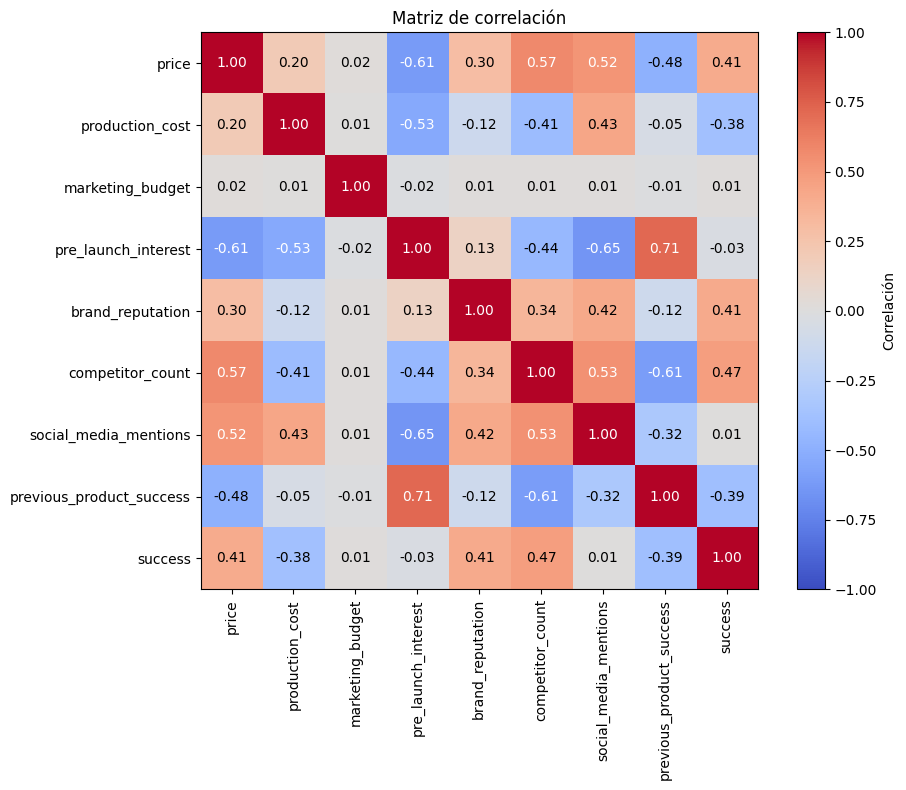

In [ ]:
# Seleccionar solo las columnas numéricas
df_numericas = df.select_dtypes(include=["float64", "int64"])

# Calcular matriz de correlación
correlation_matrix = df_numericas.corr()

# Visualización
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap="coolwarm", interpolation="none", vmin=-1, vmax=1)
plt.colorbar(label="Correlación")

cols = df_numericas.columns
plt.xticks(range(len(cols)), cols, rotation=90)
plt.yticks(range(len(cols)), cols)

for i in range(len(cols)):
    for j in range(len(cols)):
        value = correlation_matrix.iloc[i, j]
        color = 'white' if abs(value) > 0.5 else 'black'
        plt.text(j, i, f"{value:.2f}", ha='center', va='center', color=color, fontsize=10)

plt.title("Matriz de correlación")
plt.tight_layout()
plt.show()

Las tres variables con mayor correlación positiva respecto al éxito del producto son el número de competidores (0.47), la reputación de la marca (0.41) y el precio (0.41). Esto sugiere que los productos exitosos suelen pertenecer a marcas bien valoradas, tienen precios más altos y compiten en mercados activos, posiblemente más visibles o dinámicos.

Por otro lado, las correlaciones negativas más destacadas son: el éxito previo de otros productos de la marca (-0.39) y el coste de producción (-0.38). Es decir, cuanto mayor ha sido el éxito pasado de la marca, menor probabilidad de éxito en el nuevo producto, lo cual puede deberse a una fatiga de marca, expectativas demasiado altas o cambios en el mercado. Del mismo modo, un mayor coste de producción no garantiza que el producto sea mejor recibido: puede implicar sobreinversión en características que no aportan valor percibido por el consumidor.

Estas relaciones indican qué factores tienen más influencia lineal sobre el éxito y orientan qué variables pueden tener más peso predictivo en modelos supervisados.


## Equilibrio

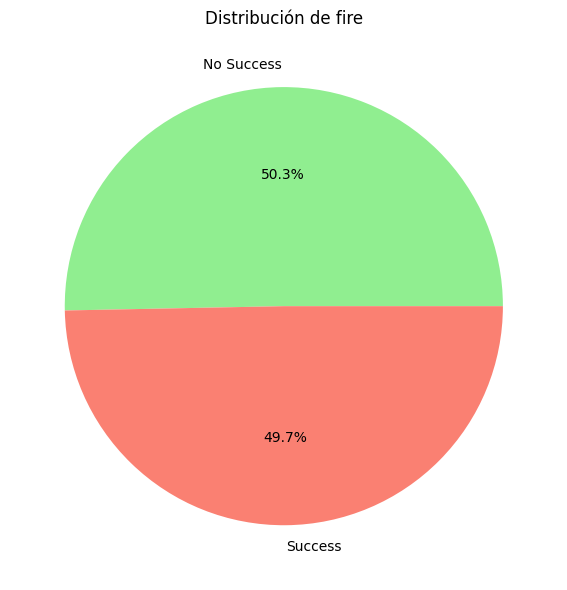

In [ ]:
plt.figure(figsize=(6, 6))
df['success'].map({0: 'No Success', 1: 'Success'}).value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title('Distribución de fire')
plt.ylabel("")
plt.tight_layout()
plt.show()

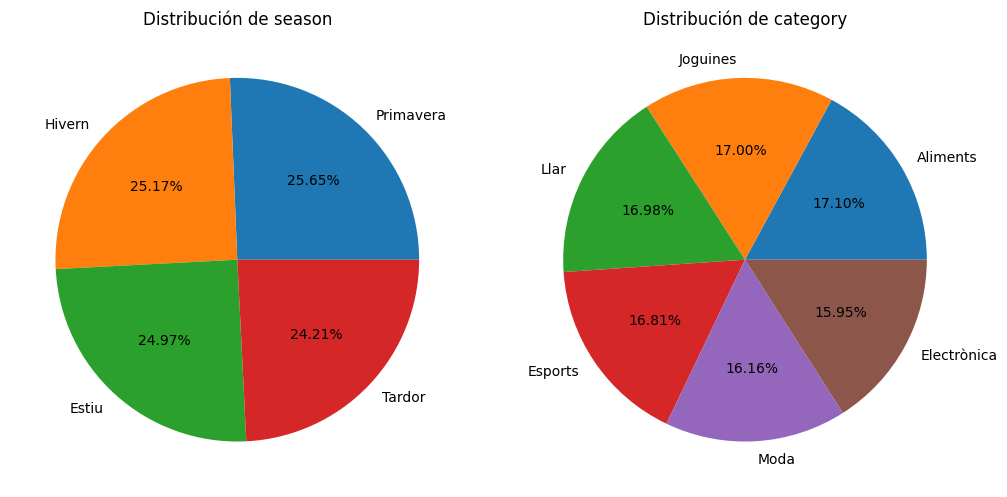

In [ ]:
# Comprobamos si las variables categóricas están equilibradas

import matplotlib.pyplot as plt

# Seleccionar las columnas categóricas (tipo 'object' o 'category')
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Configurar los gráficos en 3 columnas
num_cols_per_row = 3
num_rows = (len(cat_cols) + num_cols_per_row - 1) // num_cols_per_row  # Calcular filas necesarias

# Crear la figura con 3 columnas
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols_per_row, figsize=(15, 6 * num_rows))

# Aplanar los ejes para facilitar el recorrido
axes = axes.flatten()

# Generar gráficos de sectores para cada variable categórica
for i, col in enumerate(cat_cols):
    counts = df[col].value_counts()
    labels = counts.index.astype(str)

    axes[i].pie(counts, labels=labels, autopct='%.2f%%')
    axes[i].set_title(f'Distribución de {col}')

# Ocultar ejes vacíos si hay menos categorías que subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Outliers

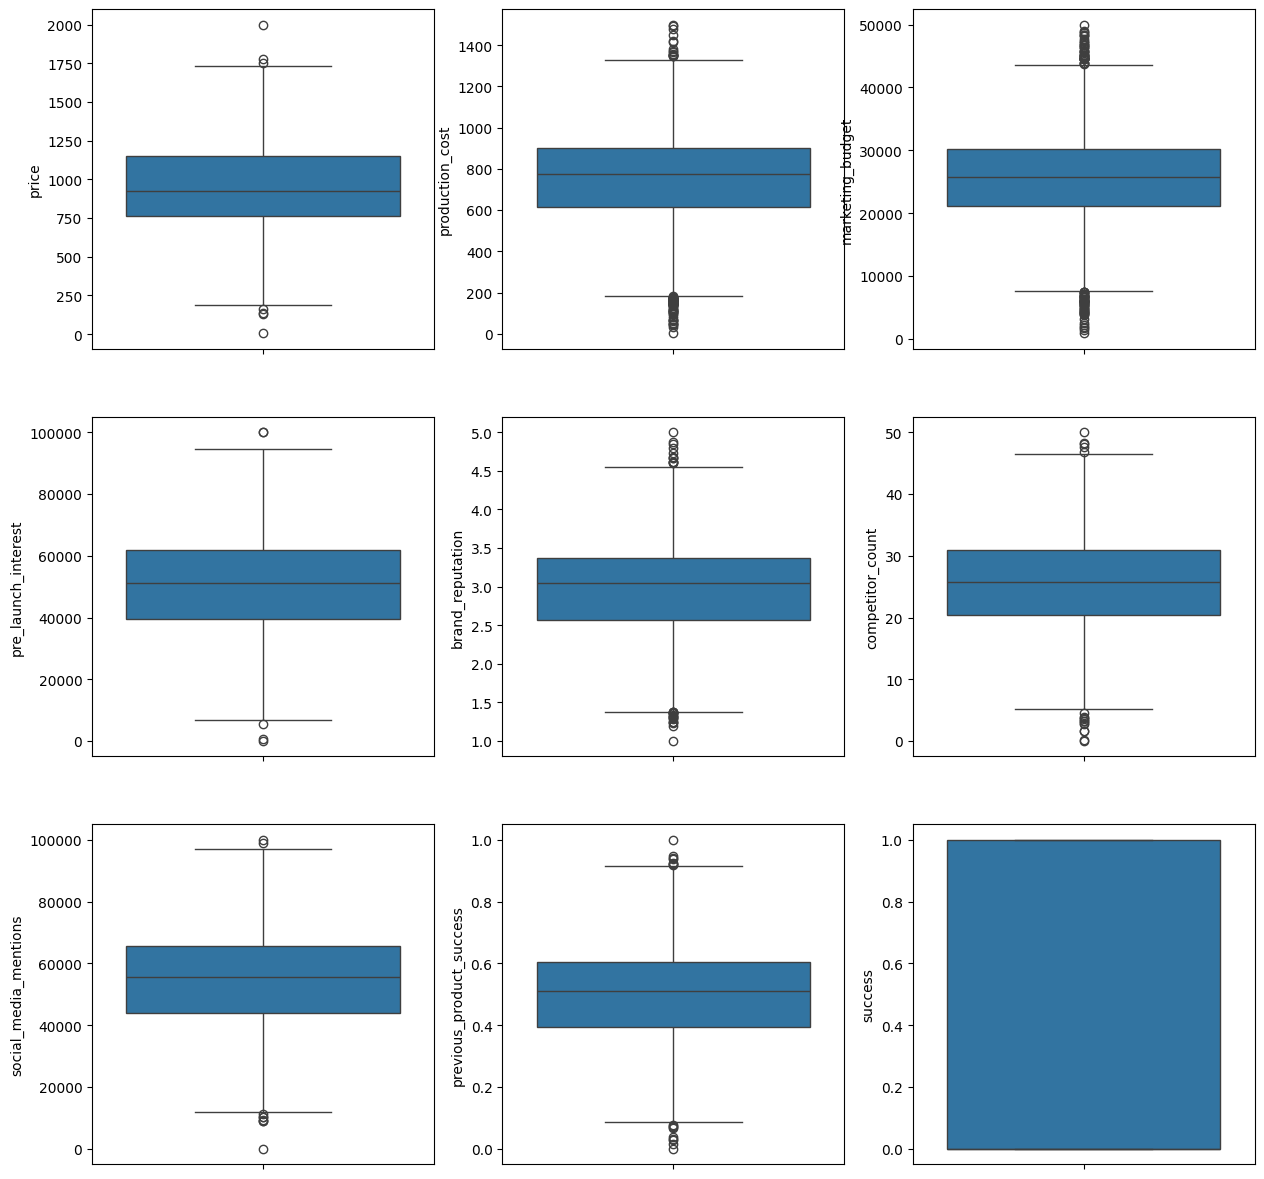

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las columnas numéricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Configurar los gráficos en 3 columnas
num_cols_per_row = 3
num_rows = (len(num_cols) + num_cols_per_row - 1) // num_cols_per_row

# Crear la figura
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols_per_row, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Generar boxplots para cada variable numérica
for i, col in enumerate(num_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title

In [ ]:
# Calcular el rango intercuartílico (IQR) para cada columna numérica
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Contar el número de outliers por característica
outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).sum()

# Mostrar el resultado
print("Número de outliers por columna:")
print(outliers)

Número de outliers por columna:
price                        7
production_cost             76
marketing_budget            97
pre_launch_interest          5
brand_reputation            29
competitor_count            17
social_media_mentions        9
previous_product_success    17
success                      0
dtype: int64


# Fase 3: División de los datos

In [ ]:
# División previa de los datos del dataframe. X serán las características e y será la columna objetivo
X = df.drop('success', axis=1)
y = df['success']

In [ ]:
# División de los datos en entrenamiento (70%) y test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Encoders y escalado

In [ ]:
# Definir columnas categóricas y numéricas (sin incluir la variable objetivo)
cat_cols = ['category', 'season']
num_cols = ['price', 'production_cost', 'marketing_budget', 'pre_launch_interest',
            'brand_reputation', 'competitor_count', 'social_media_mentions',
            'previous_product_success']

# Inicializar escalador
scaler = StandardScaler()

# Inicializar diccionario para guardar los LabelEncoders
label_encoders = {}

# Aplicar LabelEncoder a las columnas categóricas (ajustar solo con el conjunto de entrenamiento)
for col in cat_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le

# Aplicar StandardScaler a las columnas numéricas
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Fase 4: Entrenamiento del modelo y realización de las predicciones y Fase 5: Validación del modelo (NB)

Exactitud: 0.8664
Precisión: 0.8698


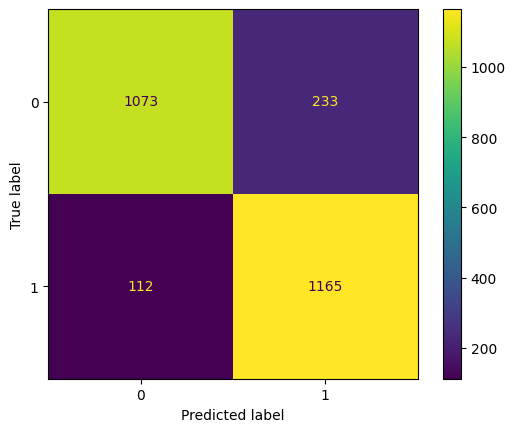

In [ ]:
# Inicialización del clasificador
clasificador_NB = GaussianNB()

# Entrenamiento del clasificador
clasificador_NB.fit(X_train, y_train)

# Realización de las predicciones
predicciones_NB = clasificador_NB.predict(X_test)

# Creación de la matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, predicciones_NB);

# Cálculo de varias métricas de rendimiento
accuracy_NB = accuracy_score(y_test, predicciones_NB)
precision_NB = precision_score(y_test, predicciones_NB, average='weighted')
print(f"Exactitud: {accuracy_NB:.4f}")
print(f"Precisión: {precision_NB:.4f}")

# Fase 4: Entrenamiento del modelo y realización de las predicciones y Fase 5: Validación del modelo (k-NN)

Exactitud: 0.9563
Precisión: 0.9563


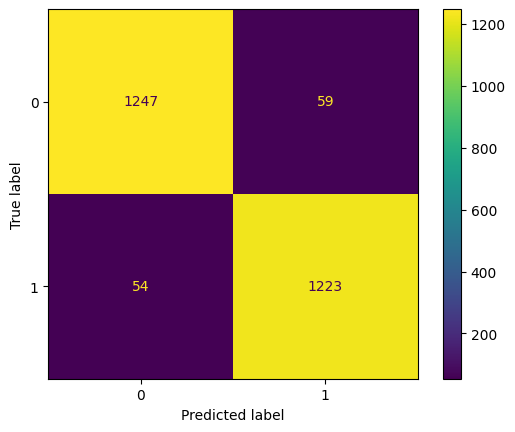

In [ ]:
# Inicialización del clasificador
clasificador_KNN = KNeighborsClassifier(n_neighbors=5)

# Entrenamiento del clasificador
clasificador_KNN.fit(X_train, y_train)

# Realización de las predicciones
predicciones_KNN = clasificador_KNN.predict(X_test)

# Creación de la matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, predicciones_KNN);

# Cálculo de varias métricas de rendimiento
accuracy_KNN = accuracy_score(y_test, predicciones_KNN)
precision_KNN = precision_score(y_test, predicciones_KNN, average='weighted')
print(f"Exactitud: {accuracy_KNN:.4f}")
print(f"Precisión: {precision_KNN:.4f}")

# Fase 4: Entrenamiento del modelo y realización de las predicciones y Fase 5: Validación del modelo (RL)

Exactitud: 0.8668
Precisión: 0.8670


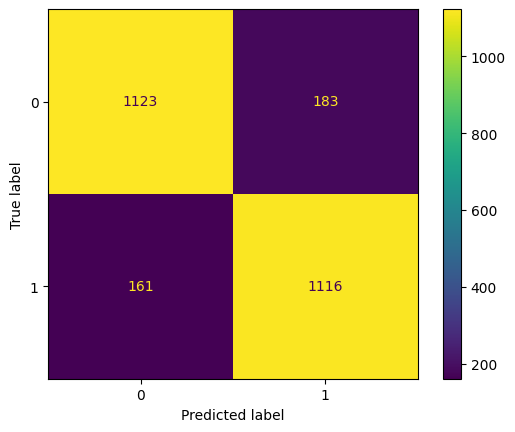

In [ ]:
from sklearn.linear_model import LogisticRegression

# Inicialización del clasificador
clasificador_RL = LogisticRegression(max_iter=1000)

# Entrenamiento del clasificador
clasificador_RL.fit(X_train, y_train)

# Realización de las predicciones
predicciones_RL = clasificador_RL.predict(X_test)

# Creación de la matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, predicciones_RL);

# Cálculo de varias métricas de rendimiento
accuracy_RL = accuracy_score(y_test, predicciones_RL)
precision_RL = precision_score(y_test, predicciones_RL, average='weighted')
print(f"Exactitud: {accuracy_RL:.4f}")
print(f"Precisión: {precision_RL:.4f}")

# Fase 4: Entrenamiento del modelo y realización de las predicciones y Fase 5: Validación del modelo (SVC)

Exactitud: 0.9694
Precisión: 0.9695


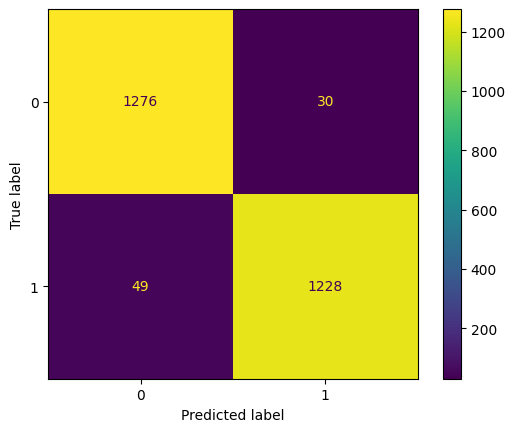

In [ ]:
# Inicialización del clasificador
clasificador_SVC = SVC()

# Entrenamiento del clasificador
clasificador_SVC.fit(X_train, y_train)

# Realización de las predicciones
predicciones_SVC = clasificador_SVC.predict(X_test)

# Creación de la matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, predicciones_SVC);

# Cálculo de varias métricas de rendimiento
accuracy_SVC = accuracy_score(y_test, predicciones_SVC)
precision_SVC = precision_score(y_test, predicciones_SVC, average='weighted')
print(f"Exactitud: {accuracy_SVC:.4f}")
print(f"Precisión: {precision_SVC:.4f}")

# Fase 4: Entrenamiento del modelo y realización de las predicciones y Fase 5: Validación del modelo (DT)

Exactitud: 0.9423
Precisión: 0.9426


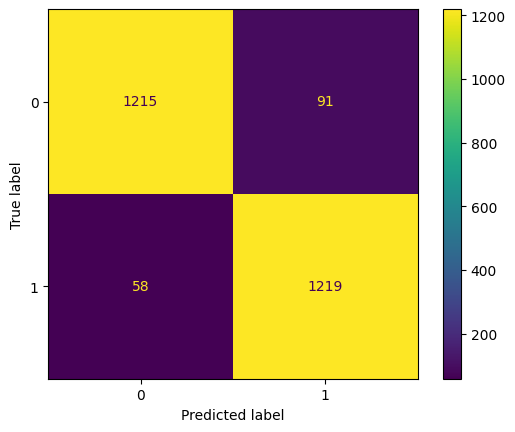

In [ ]:
# Inicialización del clasificador
clasificador_DT = DecisionTreeClassifier(random_state=42)

# Entrenamiento del clasificador
clasificador_DT.fit(X_train, y_train)

# Realización de las predicciones
predicciones_DT = clasificador_DT.predict(X_test)

# Creación de la matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, predicciones_DT);

# Cálculo de varias métricas de rendimiento
accuracy_DT = accuracy_score(y_test, predicciones_DT)
precision_DT = precision_score(y_test, predicciones_DT, average='weighted')
print(f"Exactitud: {accuracy_DT:.4f}")
print(f"Precisión: {precision_DT:.4f}")

# Fase 4: Entrenamiento del modelo y realización de las predicciones y Fase 5: Validación del modelo (RF)

Exactitud: 0.9713
Precisión: 0.9714


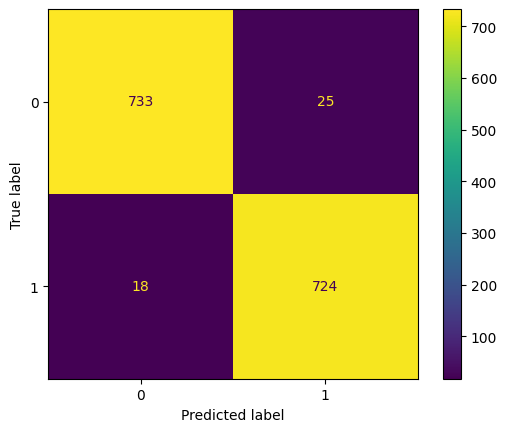

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Inicialización del clasificador
clasificador_RF = RandomForestClassifier(random_state=42)

# Entrenamiento del clasificador
clasificador_RF.fit(X_train, y_train)

# Realización de las predicciones
predicciones_RF = clasificador_RF.predict(X_test)

# Creación de la matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, predicciones_RF);

# Cálculo de varias métricas de rendimiento
accuracy_RF = accuracy_score(y_test, predicciones_RF)
precision_RF = precision_score(y_test, predicciones_RF, average='weighted')
print(f"Exactitud: {accuracy_RF:.4f}")
print(f"Precisión: {precision_RF:.4f}")

# Fase 4: Entrenamiento del modelo y realización de las predicciones y Fase 5: Validación del modelo (Adaboost)

Exactitud: 0.9311
Precisión: 0.9311


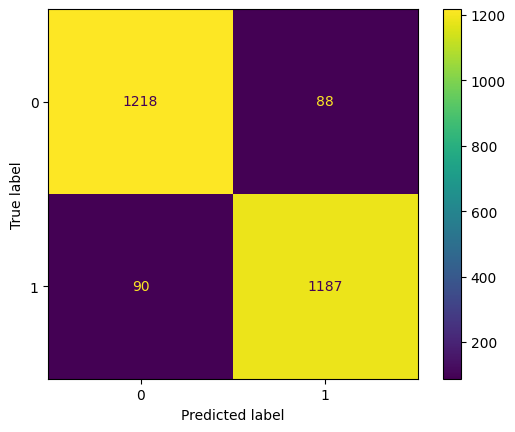

In [ ]:
# Inicialización del clasificador
clasificador_AB = AdaBoostClassifier(random_state=42)

# Entrenamiento del clasificador
clasificador_AB.fit(X_train, y_train)

# Realización de las predicciones
predicciones_AB = clasificador_AB.predict(X_test)

# Creación de la matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, predicciones_AB);

# Cálculo de varias métricas de rendimiento
accuracy_AB = accuracy_score(y_test, predicciones_AB)
precision_AB = precision_score(y_test, predicciones_AB, average='weighted')
print(f"Exactitud: {accuracy_AB:.4f}")
print(f"Precisión: {precision_AB:.4f}")

| Modelo         | Exactitud | Precisión |
|----------------|-----------|-----------|
| Naive Bayes    | 0.8664    | 0.8698    |
| KNN            | 0.9563    | 0.9563    |
| Regresión Log. | 0.8668    | 0.8670    |
| SVM (SVC)      | 0.9694    | 0.9695    |
| Árbol Decisión | 0.9423    | 0.9426    |
| Random Forest  | 0.9713    | 0.9714    |
| AdaBoost       | 0.9311    | 0.9311    |

#Fase 6: Optimitzación del modelo y Fase 7: Validación del nuevo modelo (NB)

Mejores hiperparámetros: {'var_smoothing': 1e-09}
Exactitud: 0.8664
Precisión: 0.8698


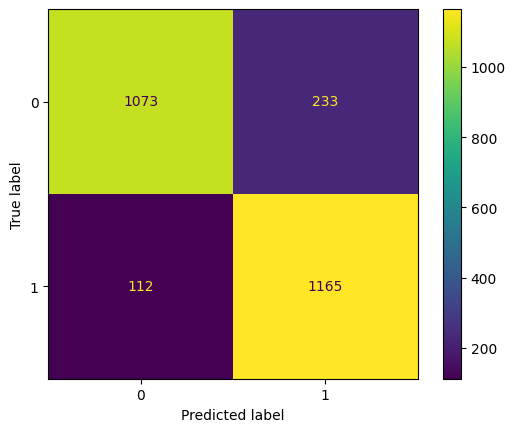

In [ ]:
# Inicialización del clasificador
clasificador_NB2 = GaussianNB()

# Definición del grid de hiperparámetros
# var_smoothing evita divisiones por cero o varianzas demasiado pequeñas en las probabilidades
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}

# Inicialización de GridSearchCV con validación cruzada
grid_search = GridSearchCV(clasificador_NB2, param_grid, cv=5, n_jobs=-1)

# Entrenamiento con búsqueda de los mejores hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Crear el clasificador con los mejores valores encontrados
clasificador_NB2 = GaussianNB(**best_params)

# Entrenamiento del modelo optimizado
clasificador_NB2.fit(X_train, y_train)

# Predicciones sobre el conjunto de test
predicciones_NB2 = clasificador_NB2.predict(X_test)

# Matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, predicciones_NB2)

# Cálculo de métricas
accuracy_NB2 = accuracy_score(y_test, predicciones_NB2)
precision_NB2 = precision_score(y_test, predicciones_NB2, average='weighted')

# Mostrar resultados
print(f"Exactitud: {accuracy_NB2:.4f}")
print(f"Precisión: {precision_NB2:.4f}")

#Fase 6: Optimitzación del modelo y Fase 7: Validación del nuevo modelo (k-NN)

Mejores hiperparámetros: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Exactitud: 0.9586
Precisión: 0.9586


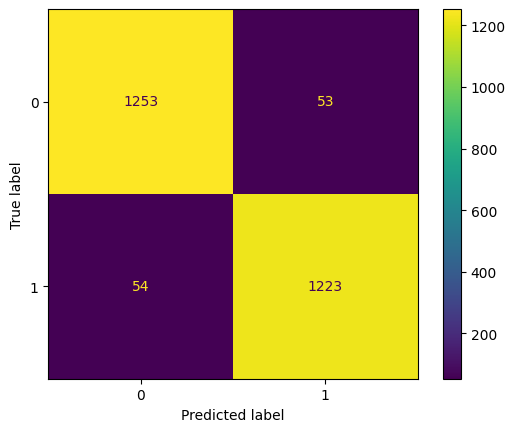

In [ ]:
# Inicialización del clasificador KNN
clasificador_KNN2 = KNeighborsClassifier()

# Definición del grid de hiperparámetros
# Se prueban distintos vecinos, distancias y formas de ponderar
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'weights': ['uniform', 'distance'],
}

# Inicialización de GridSearchCV con validación cruzada
grid_search = GridSearchCV(clasificador_KNN2, param_grid, cv=5, n_jobs=-1)

# Entrenamiento con búsqueda de los mejores hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Crear el clasificador con los mejores valores encontrados
clasificador_KNN2 = KNeighborsClassifier(**best_params)

# Entrenamiento del modelo optimizado
clasificador_KNN2.fit(X_train, y_train)

# Predicciones sobre el conjunto de test
predicciones_KNN2 = clasificador_KNN2.predict(X_test)

# Matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, predicciones_KNN2)

# Cálculo de métricas
accuracy_KNN2 = accuracy_score(y_test, predicciones_KNN2)
precision_KNN2 = precision_score(y_test, predicciones_KNN2, average='weighted')

# Mostrar resultados
print(f"Exactitud: {accuracy_KNN2:.4f}")
print(f"Precisión: {precision_KNN2:.4f}")

#Fase 6: Optimitzación del modelo y Fase 7: Validación del nuevo modelo (RL)

Mejores hiperparámetros: {'C': 100, 'penalty': 'l2'}
Exactitud: 0.8676
Precisión: 0.8677


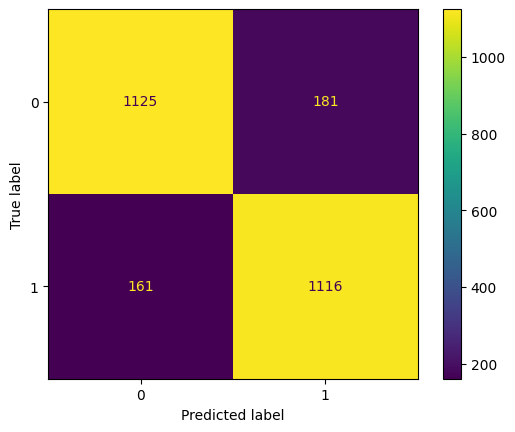

In [ ]:
# Inicialización del clasificador
clasificador_LR2 = LogisticRegression(solver='liblinear')

# Definición del grid de hiperparámetros
# La regularización evita que el modelo se sobreajuste a los datos de entrenamiento
# C controla la intensidad de esa regularización (valores bajos = más regularización)
# penalty indica el tipo de regularización a aplicar (en este caso L2 = Ridge)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l2']
}

# Inicialización de GridSearchCV con validación cruzada
grid_search = GridSearchCV(clasificador_LR2, param_grid, cv=5, n_jobs=-1)

# Entrenamiento con búsqueda de los mejores hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Crear el clasificador con los mejores valores encontrados
clasificador_LR2 = LogisticRegression(solver='liblinear', **best_params)

# Entrenamiento del modelo optimizado
clasificador_LR2.fit(X_train, y_train)

# Predicciones sobre el conjunto de test
predicciones_LR2 = clasificador_LR2.predict(X_test)

# Matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, predicciones_LR2)

# Cálculo de métricas
accuracy_LR2 = accuracy_score(y_test, predicciones_LR2)
precision_LR2 = precision_score(y_test, predicciones_LR2, average='weighted')

# Mostrar resultados
print(f"Exactitud: {accuracy_LR2:.4f}")
print(f"Precisión: {precision_LR2:.4f}")

#Fase 6: Optimitzación del modelo y Fase 7: Validación del nuevo modelo (SVC)

Mejores hiperparámetros: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Exactitud: 0.9737
Precisión: 0.9737


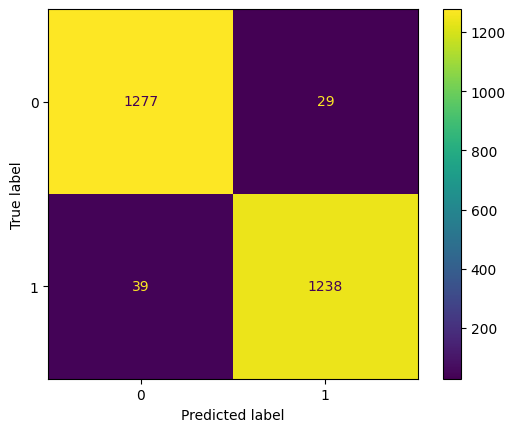

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, ConfusionMatrixDisplay

# Inicialización del clasificador SVC
clasificador_SVC2 = SVC()

# Definición del grid de hiperparámetros
# C controla la regularización (valores bajos = modelo más simple)
# kernel define la forma del límite de decisión
# gamma influye en el alcance de cada muestra como soporte (solo para RBF y sigmoid)
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Búsqueda de los mejores hiperparámetros
grid_search = GridSearchCV(clasificador_SVC2, param_grid, cv=5, n_jobs=-1)

# Entrenamiento del modelo
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Crear y entrenar el modelo final con los mejores hiperparámetros
clasificador_SVC2 = SVC(**best_params)
clasificador_SVC2.fit(X_train, y_train)

# Predicciones sobre el conjunto de test
predicciones_SVC2 = clasificador_SVC2.predict(X_test)

# Matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, predicciones_SVC2)

# Cálculo de métricas
accuracy_SVC2 = accuracy_score(y_test, predicciones_SVC2)
precision_SVC2 = precision_score(y_test, predicciones_SVC2, average='weighted')

# Mostrar resultados
print(f"Exactitud: {accuracy_SVC2:.4f}")
print(f"Precisión: {precision_SVC2:.4f}")

#Fase 6: Optimitzación del modelo y Fase 7: Validación del nuevo modelo (DT)

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Exactitud: 0.9466
Precisión: 0.9466


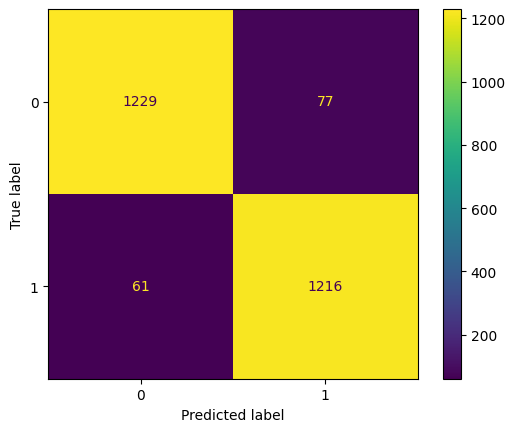

In [ ]:
# Inicialización del clasificador
clasificador_DT2 = DecisionTreeClassifier(random_state=42)

# Grid de hiperparámetros
param_grid = {
    'max_depth': [3, 5, 10, None],               # Máxima profundidad del árbol (None = sin límite)
    'min_samples_split': [2, 5, 10],             # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],               # Mínimo de muestras en cada hoja (evita ramas muy pequeñas)
    'criterion': ['gini', 'entropy']             # Método para calcular la calidad de las divisiones
}

# Búsqueda de hiperparámetros
grid_search = GridSearchCV(clasificador_DT2, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor configuración encontrada
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Modelo final con mejor configuración
clasificador_DT2 = DecisionTreeClassifier(random_state=42, **best_params)
clasificador_DT2.fit(X_train, y_train)

# Predicción y evaluación
predicciones_DT2 = clasificador_DT2.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, predicciones_DT2)
accuracy_DT2 = accuracy_score(y_test, predicciones_DT2)
precision_DT2 = precision_score(y_test, predicciones_DT2, average='weighted')
print(f"Exactitud: {accuracy_DT2:.4f}")
print(f"Precisión: {precision_DT2:.4f}")

#Fase 6: Optimitzación del modelo y Fase 7: Validación del nuevo modelo (RF)

Mejores hiperparámetros: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Exactitud: 0.9706
Precisión: 0.9706


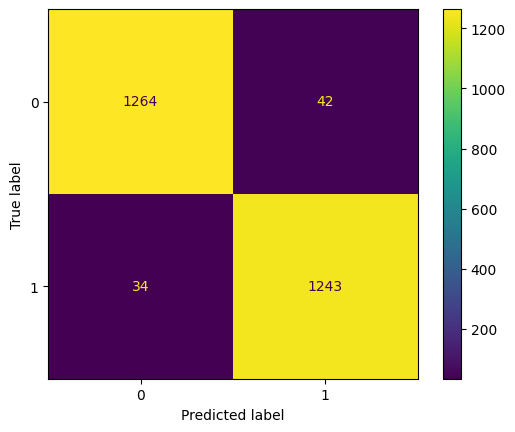

In [ ]:
# Inicialización del clasificador
clasificador_RF2 = RandomForestClassifier(random_state=42)

# Grid de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],             # Nº de árboles del bosque
    'max_depth': [None, 10, 20],                 # Profundidad máxima por árbol
    'min_samples_split': [2, 5],                 # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2],                  # Mínimo de muestras en una hoja
    'max_features': ['sqrt', 'log2'],            # Nº de variables consideradas en cada división
    'bootstrap': [True, False]                   # Si se usan muestras con reemplazo (bootstrapping)
}

# Búsqueda de hiperparámetros
grid_search = GridSearchCV(clasificador_RF2, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor configuración encontrada
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Modelo final con mejor configuración
clasificador_RF2 = RandomForestClassifier(random_state=42, **best_params)
clasificador_RF2.fit(X_train, y_train)

# Predicción y evaluación
predicciones_RF2 = clasificador_RF2.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, predicciones_RF2)
accuracy_RF2 = accuracy_score(y_test, predicciones_RF2)
precision_RF2 = precision_score(y_test, predicciones_RF2, average='weighted')
print(f"Exactitud: {accuracy_RF2:.4f}")
print(f"Precisión: {precision_RF2:.4f}")

#Fase 6: Optimitzación del modelo y Fase 7: Validación del nuevo modelo (Adaboost)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

Mejores hiperparámetros: {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 200}


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Exactitud: 0.9431
Precisión: 0.9431


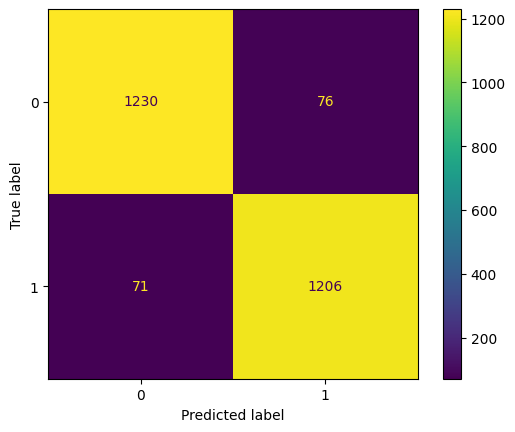

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Inicialización del clasificador
clasificador_AB2 = AdaBoostClassifier(random_state=42)

# Grid de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],              # Nº de clasificadores débiles (pasos de boosting)
    'learning_rate': [0.1, 0.5, 1.0, 1.5],       # Cuánto se ajusta el modelo en cada iteración

}

# Búsqueda de hiperparámetros
grid_search = GridSearchCV(clasificador_AB2, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor configuración encontrada
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Modelo final con mejor configuración
clasificador_AB2 = AdaBoostClassifier(random_state=42, **best_params)
clasificador_AB2.fit(X_train, y_train)

# Predicción y evaluación
predicciones_AB2 = clasificador_AB2.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, predicciones_AB2)
accuracy_AB2 = accuracy_score(y_test, predicciones_AB2)
precision_AB2 = precision_score(y_test, predicciones_AB2, average='weighted')
print(f"Exactitud: {accuracy_AB2:.4f}")
print(f"Precisión: {precision_AB2:.4f}")

# Fase 8: Conclusiones

| Modelo           | Exactitud Antes | Precisión Antes | Exactitud Después | Precisión Después |
|------------------|------------------|------------------|--------------------|--------------------|
| Naive Bayes      | 0.8664           | 0.8698           | 0.8664             | 0.8698             |
| KNN              | 0.9563           | 0.9563           | 0.9586             | 0.9586             |
| Regresión Logística | 0.8668       | 0.8670           | 0.8676             | 0.8677             |
| SVC              | 0.9694           | 0.9695           | 0.9737             | 0.9737             |
| Árbol Decisión   | 0.9423           | 0.9426           | 0.9466             | 0.9466             |
| Random Forest    | 0.9713           | 0.9714           | 0.9706             | 0.9706             |
| AdaBoost         | 0.9311           | 0.9311           | 0.9431             | 0.9431             |


Aunque Random Forest obtiene resultados muy altos en ambas versiones, el modelo SVC optimizado alcanza la mayor exactitud y precisión (0.9737), superando ligeramente a los demás. Además, presenta un equilibrio muy bueno entre falsos positivos y falsos negativos. Por tanto, si se busca el modelo más fiable y preciso, SVC optimizado sería la mejor elección.

Si también se valora la interpretabilidad del modelo, alternativas como AdaBoost o el árbol de decisión optimizado ofrecen buenos resultados y son más fáciles de explicar.

# Fase 9: Pruebas

## Guardar el modelo

In [ ]:
import joblib
import os

# Asignar el modelo con mejor rendimiento
mejor_modelo = clasificador_SVC2

# Ruta donde guardar el modelo
ruta = '/content/drive/MyDrive/CURSO_MACHINE_LEARNING/MEJORES_MODELOS/'

# Crear el directorio si no existe
os.makedirs(ruta, exist_ok=True)

# Definir ruta completa del archivo
ruta_modelo = os.path.join(ruta, "mejor_modelo.pkl")

# Guardar el modelo entrenado
joblib.dump(mejor_modelo, ruta_modelo)
print(f"Modelo guardado en: {ruta_modelo}")

Modelo guardado en: /content/drive/MyDrive/CURSO_MACHINE_LEARNING/MEJORES_MODELOS/mejor_modelo.pkl


## Cargamos el modelo

In [ ]:
# Importar librerías necesarias
from google.colab import drive
import joblib
import os

# Montar Google Drive
drive.mount('/content/drive')

# Definir la ruta donde guardaste el modelo
ruta = '/content/drive/MyDrive/CURSO_MACHINE_LEARNING/MEJORES_MODELOS/'
ruta_modelo = os.path.join(ruta, "mejor_modelo.pkl")

# Cargar el modelo sin necesidad de volver a entrenarlo
mejor_modelo = joblib.load(ruta_modelo)
print("¡Modelo cargado correctamente!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
¡Modelo cargado correctamente!


## Comprobación del sobreajuste

In [ ]:
# Parece estable y generaliza bien
from sklearn.model_selection import cross_val_score

# Evaluación con validación cruzada sobre los datos de entrenamiento
cv_scores = cross_val_score(mejor_modelo, X_train, y_train, cv=5, scoring='accuracy')

print(f"Precisión media en validación cruzada: {cv_scores.mean():.4f} - Desviación estándar: {cv_scores.std():.4f}")

Precisión media en validación cruzada: 0.9663 - Desviación estándar: 0.0037


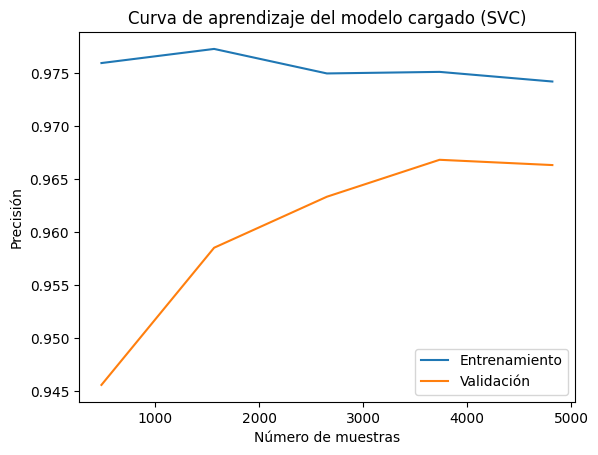

In [ ]:
"""
La precisión en entrenamiento se mantiene estable alrededor de 0.975. La precisión en validación mejora
progresivamente al aumentar el número de muestras, alcanzando un valor cercano a 0.967.
La diferencia entre ambas curvas es pequeña, lo que indica buen ajuste y buena capacidad de generalización del modelo.
"""
from sklearn.model_selection import learning_curve

# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(mejor_modelo, X_train, y_train, cv=5, scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Entrenamiento')
plt.plot(train_sizes, test_mean, label='Validación')
plt.xlabel('Número de muestras')
plt.ylabel('Precisión')
plt.legend()
plt.title('Curva de aprendizaje del modelo cargado (SVC)')
plt.show()

Exactitud en noves dades: 0.9676
Precisió en noves dades: 0.9676


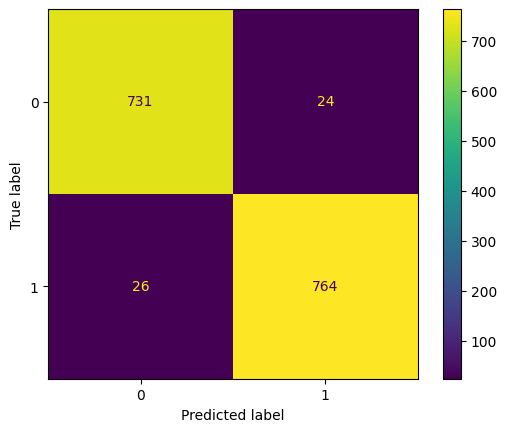

In [ ]:
# Convertir la variable objetivo a 0 y 1 si aún no está en ese formato
if df_testing['success'].dtype == 'object':
    df_testing['success'] = df_testing['success'].map({'Yes': 1, 'No': 0})

# Tratar valores nulos con la mediana
df_testing.loc[:, 'price'] = df_testing['price'].fillna(df['price'].median())
df_testing.loc[:, 'marketing_budget'] = df_testing['marketing_budget'].fillna(df['marketing_budget'].median())
df_testing.loc[:, 'pre_launch_interest'] = df_testing['pre_launch_interest'].fillna(df['pre_launch_interest'].median())

# Eliminar columna id si existe
if 'id' in df_testing.columns:
    df_testing = df_testing.drop('id', axis=1)

# Separar características y variable objetivo
X_testing = df_testing.drop('success', axis=1)
y_testing = df_testing['success']

# Aplicar Label Encoding con los codificadores entrenados
for col in cat_cols:
    X_testing[col] = label_encoders[col].transform(X_testing[col])

# Escalar columnas numéricas con el scaler ya entrenado
X_testing[num_cols] = scaler.transform(X_testing[num_cols])

# Predecir clases
predicciones_testing = mejor_modelo.predict(X_testing)

# Calcular métricas con etiquetas binarias
accuracy_testeig = accuracy_score(y_testing, predicciones_testing)
precision_testeig = precision_score(y_testing, predicciones_testing, average='weighted')

# Mostrar resultados
print(f"Exactitud en noves dades: {accuracy_testeig:.4f}")
print(f"Precisió en noves dades: {precision_testeig:.4f}")

# Visualizar matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_testing, predicciones_testing);

Exactitud con ruido: 0.9618
Precisión con ruido: 0.9618


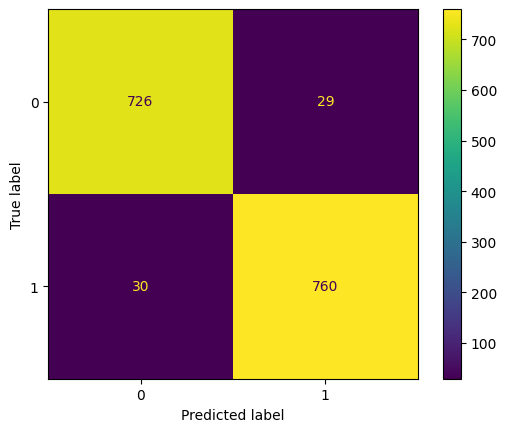

In [ ]:
# Mapear la variable objetivo (si aún no se ha hecho)
df_testing_ruido['success'] = df_testing_ruido['success'].map({'Yes': 1, 'No': 0})

# Tratar valores nulos con la mediana
df_testing_ruido['price'] = df_testing_ruido['price'].fillna(df['price'].median())
df_testing_ruido['marketing_budget'] = df_testing_ruido['marketing_budget'].fillna(df['marketing_budget'].median())
df_testing_ruido['pre_launch_interest'] = df_testing_ruido['pre_launch_interest'].fillna(df['pre_launch_interest'].median())

# Eliminar id si existe
if 'id' in df_testing_ruido.columns:
    df_testing_ruido = df_testing_ruido.drop('id', axis=1)

# Separar X e y
X_testing_ruido = df_testing_ruido.drop('success', axis=1)
y_testing_ruido = df_testing_ruido['success']

# Aplicar LabelEncoder a categóricas con los encoders ya entrenados
for col in cat_cols:
    X_testing_ruido[col] = label_encoders[col].transform(X_testing_ruido[col])

# Escalar numéricas
X_testing_ruido[num_cols] = scaler.transform(X_testing_ruido[num_cols])

# Añadir ruido solo a columnas numéricas
np.random.seed(42)
X_testing_ruido[num_cols] += np.random.normal(loc=0, scale=0.1, size=X_testing_ruido[num_cols].shape)

# Predecir
pred_ruido = mejor_modelo.predict(X_testing_ruido)

# Calcular métricas
accuracy_ruido = accuracy_score(y_testing_ruido, pred_ruido)
precision_ruido = precision_score(y_testing_ruido, pred_ruido, average='weighted')

# Mostrar resultados
print(f"Exactitud con ruido: {accuracy_ruido:.4f}")
print(f"Precisión con ruido: {precision_ruido:.4f}")

# Matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_testing_ruido, pred_ruido)

**¿Por qué se añade ruido?**
Para simular errores, inestabilidad, o imprecisiones como los que pueden ocurrir en datos reales recogidos por sensores, formularios, encuestas, etc. Así puedes ver si el modelo es robusto o si se hunde con pequeñas alteraciones.

Ruido 0.1 significa que se està alterando las variables numéricas originales multiplicándolas por un valor aleatorio que varía alrededor de su valor real, con una variación del 10% en promedio.

## Nuevas predicciones

In [ ]:
# Nueva observación a predecir (ejemplo sin éxito)
nueva_observacion = pd.DataFrame({
    'production_cost': [777],
    'marketing_budget': [14413],
    'pre_launch_interest': [28628],
    'brand_reputation': [2],
    'competitor_count': [32],
    'social_media_mentions': [58246],
    'previous_product_success': [0.27],
    'price': [1077],
    'season': ['Primavera'],
    'category': ['Electrònica']
})

# Aplicar codificadores LabelEncoder
for col in cat_cols:
    nueva_observacion[col] = label_encoders[col].transform(nueva_observacion[col])

# Aplicar escalado
nueva_observacion[num_cols] = scaler.transform(nueva_observacion[num_cols])

# Reordenar columnas exactamente como en el entrenamiento
columnas_finales = list(X_train.columns)
nueva_observacion = nueva_observacion[columnas_finales]

# Predecir
prediccion = mejor_modelo.predict(nueva_observacion)

# Mostrar resultado
if prediccion[0] == 1:
    print("Predicción: Yes (éxito)")
else:
    print("Predicción: No (no éxito)")

Predicción: No (no éxito)


In [ ]:
# Nueva observación a predecir (ejemplo con éxito esperado)
nueva_observacion = pd.DataFrame({
    'production_cost': [1137],               # Coste de producción
    'marketing_budget': [21818],             # Presupuesto de marketing
    'pre_launch_interest': [36448],          # Interés previo al lanzamiento
    'brand_reputation': [3],                 # Reputación de la marca (escala 1 a 5)
    'competitor_count': [23],                # Número de competidores
    'social_media_mentions': [75276],        # Menciones en redes sociales
    'previous_product_success': [0.46],      # Éxito medio de productos anteriores
    'price': [1241],                         # Precio del producto
    'season': ['Estiu'],                     # Estación de lanzamiento
    'category': ['Llar']                     # Categoría del producto
})


# Codificar columnas categóricas con LabelEncoder
for col in cat_cols:
    nueva_observacion[col] = label_encoders[col].transform(nueva_observacion[col])

# Escalar las columnas numéricas
nueva_observacion[num_cols] = scaler.transform(nueva_observacion[num_cols])

# Reordenar columnas en el mismo orden que X_train
nueva_observacion = nueva_observacion[X_train.columns]

# Predecir
prediccion = mejor_modelo.predict(nueva_observacion)

# Mostrar resultado
if prediccion[0] == 1:
    print("Predicción: Yes (éxito)")
else:
    print("Predicción: No (no éxito)")


Predicción: Yes (éxito)


In [ ]:
# Nueva observación a predecir (producto extremo con probabilidad de no éxito)
nueva_observacion_extrema = pd.DataFrame({
    'production_cost': [10000],              # Coste de producción muy alto
    'marketing_budget': [500],               # Presupuesto de marketing muy bajo
    'pre_launch_interest': [5],              # Muy poco interés previo al lanzamiento
    'brand_reputation': [1],                 # Mala reputación de marca
    'competitor_count': [50],                # Alta competencia
    'social_media_mentions': [10],           # Poca visibilidad en redes sociales
    'previous_product_success': [0],         # Sin historial de éxito
    'price': [10000],                        # Precio muy elevado
    'season': ['Tardor'],                    # Estación de lanzamiento
    'category': ['Electrònica']              # Categoría del producto
})


# Codificar columnas categóricas con LabelEncoder entrenado
for col in cat_cols:
    nueva_observacion_extrema[col] = label_encoders[col].transform(nueva_observacion_extrema[col])

# Escalar las columnas numéricas con el escalador ya entrenado
nueva_observacion_extrema[num_cols] = scaler.transform(nueva_observacion_extrema[num_cols])

# Asegurar el orden correcto de las columnas
nueva_observacion_extrema = nueva_observacion_extrema[X_train.columns]

# Realizar la predicción
prediccion_extrema = mejor_modelo.predict(nueva_observacion_extrema)

# Mostrar resultado
if prediccion_extrema[0] == 1:
    print("Predicción: Yes (éxito)")
else:
    print("Predicción: No (no éxito)")


Predicción: No (no éxito)


In [ ]:
# Nueva observación a predecir (producto extremo con alta probabilidad de éxito)
nueva_observacion_extrema_yes = pd.DataFrame({
    'production_cost': [100],               # Coste de producción muy bajo
    'marketing_budget': [10000],           # Presupuesto de marketing muy alto
    'pre_launch_interest': [10000],         # Mucho interés previo al lanzamiento
    'brand_reputation': [5],                # Reputación de marca excelente (1 a 5)
    'competitor_count': [25],                # Muy pocos competidores
    'social_media_mentions': [50000],       # Alta visibilidad en redes sociales
    'previous_product_success': [0.95],     # Gran historial de éxito previo
    'price': [2500],                        # Precio adecuado
    'season': ['Estiu'],                    # Estación de lanzamiento
    'category': ['Electrònica']             # Categoría del producto
})

# Codificar las variables categóricas con LabelEncoder
for col in cat_cols:
    nueva_observacion_extrema_yes[col] = label_encoders[col].transform(nueva_observacion_extrema_yes[col])

# Aplicar el escalado a las columnas numéricas
nueva_observacion_extrema_yes[num_cols] = scaler.transform(nueva_observacion_extrema_yes[num_cols])

# Reordenar columnas para que coincidan con las usadas en el entrenamiento
nueva_observacion_extrema_yes = nueva_observacion_extrema_yes[X_train.columns]

# Realizar la predicción con el modelo entrenado
prediccion_yes = mejor_modelo.predict(nueva_observacion_extrema_yes)

# Mostrar el resultado
if prediccion_yes[0] == 1:
    print("Predicción: Yes (éxito)")
else:
    print("Predicción: No (no éxito)")


Predicción: Yes (éxito)
